In [1]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#Importing the dataset

df=pd.read_csv(r'C:\Users\Hp\Documents\Water Potability\water_potability.csv')

In [3]:
#Displaying the accessed dataset

df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
#Shape of the dataset

df.shape

(3276, 10)

In [5]:
#Finding the number of unique values under each parameters in the dataset

df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [6]:
#Finding out the datatype of data that each parameters hold

df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [7]:
#Statistical Analysis of data

df.describe(include = "all")

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [8]:
#Fetching the parameters containing null values

df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Missing Values Treatment

In [9]:
#For the missing values under the pH parameter:

x = df[(df['Potability']==0) & (df['Hardness']<=150)][['ph']].mean()
x

ph    6.721973
dtype: float64

In [10]:
y = df[(df['Potability']==0) & (df['Hardness']>150)][['ph']].mean()
y

ph    7.112512
dtype: float64

In [11]:
z = df[(df['Potability']==1) & (df['Hardness']<=150)][['ph']].mean()
z

ph    7.098154
dtype: float64

In [12]:
o = df[(df['Potability']==1) & (df['Hardness']>150)][['ph']].mean()
o

ph    7.071429
dtype: float64

In [13]:
#Filling in null values of pH 

for i in range (0,len(df)):
    if (pd.isnull(df['ph'][i]) == True):
        if ((df['Potability'][i]==0) & (df['Hardness'][i]<=150)):
            df['ph'][i] = x
        elif ((df['Potability'][i]==0) & (df['Hardness'][i]>150)):
            df['ph'][i] = y
        elif ((df['Potability'][i]==1) & (df['Hardness'][i]<=150)):
             df['ph'][i] = z
        else:
             df['ph'][i] = o

In [14]:
#For the null values under Sulfate parameter:

x = df[(df['Potability']==0)][['Sulfate']].mean()
x

Sulfate    334.56429
dtype: float64

In [15]:
y = df[(df['Potability']==1)][['Sulfate']].mean()
y

Sulfate    332.56699
dtype: float64

In [16]:
#Filling in null values of Sulfate 

for i in range (0,len(df)):
    if (pd.isnull(df['Sulfate'][i]) == True):
        if (df['Potability'][i]==0):
            df['Sulfate'][i] = x
        else:
             df['Sulfate'][i] = y

In [17]:
#Filling in null values of Trihalomethanes 

df['Trihalomethanes'].fillna(value = df['Trihalomethanes'].mean() , inplace = True)

Feature Engineering

Based on the table below, Type of Water could be determined referencing their pH levels.
<style>
table {
  border-collapse: collapse;
  width: 100%;
}
</style>
<table class="center">
  <tr>
    <th>Type Of Water</th>
    <th>pH Value</th>
  </tr>
  <tr>
    <td>Tap Water</td>
    <td>Typically about 7.5</td>
  </tr>
  <tr>
    <td>Distilled Reverse Osmosis Water</td>
    <td>5 to 7</td>
  </tr>
  <tr>
    <td>Common Bottled Water</td>
    <td>6.5 to 7.5</td>
  </tr>
  <tr>
    <td>Alkaline Bottled Water</td>
    <td>8 to 9</td>
  </tr>
  <tr>
    <td>Ocean water</td>
    <td>About 8</td>
  </tr>
  <tr>
    <td>Acid rain</td>
    <td>5 to 5.5</td>
  </tr>  
</table>

In [18]:
#rounding off the pH value to one decimal place

df['ph'] = df['ph'].round(decimals = 1)
df["ph"].head()

0    7.1
1    3.7
2    8.1
3    8.3
4    9.1
Name: ph, dtype: float64

In [19]:
#Identifying the Type of Water

df["Type of Water"] = ""
for i in range(0,len(df)):
    if (df["ph"][i] > 9):
        df["Type of Water"][i] = "Alkaline water"
    elif (df["ph"][i] <= 9 and df["ph"][i] > 8):
        df["Type of Water"][i] = "Bottled waters labeled as alkaline"
    elif (df["ph"][i] <= 8 and df["ph"][i] > 7.5 ):
        df["Type of Water"][i] = "Ocean water"   
    elif(df["ph"][i] == 7.5 ):
        df["Type of Water"][i] = "Tap water"
    elif(df["ph"][i] < 7.5 and df["ph"][i] >=6.5):
        df["Type of Water"][i] = "Common bottled waters"
    elif(df["ph"][i] < 6.5 and df["ph"][i] >=5.5):
        df["Type of Water"][i] = "Distilled reverse osmosis water"
    else:
        df["Type of Water"][i] = "Acidic water"

Similarly, based on the table below, hardness level of water can also be determined from the hardness parameter.

<table class="center">
  <tr>
    <th>Classificationr</th>
    <th>mg/l or ppm</th>
  </tr>
  <tr>
    <td>Soft</td>
    <td>0 - 17.1</td>
  </tr>
  <tr>
    <td>Slightly hard</td>
    <td>17.1 - 60</td>
  </tr>
  <tr>
    <td>Moderately hard</td>
    <td>60 - 120</td>
  </tr>
  <tr>
    <td>Hard</td>
    <td>120 - 180</td>
  </tr>
  <tr>
    <td>Very Hard</td>
    <td>180 & over</td>
  </tr>  
</table>

In [20]:
#Identifying the type of hardness

df["Type of Hardness"] = ""
for i in range(0,len(df)):
    if (df["Hardness"][i] >=0  and df["Hardness"][i] < 17.1):
        df["Type of Hardness"][i] = "Soft"
    elif (df["Hardness"][i] >= 17.1 and df["Hardness"][i] < 60):
        df["Type of Hardness"][i] = "Slightly hard"
    elif (df["Hardness"][i] >= 60 and df["Hardness"][i] < 120 ):
        df["Type of Hardness"][i] = "Moderately hard"   
    elif(df["Hardness"][i] >= 120 and df["Hardness"][i] < 180):
        df["Type of Hardness"][i] = "Hard"
    else:
         df["Type of Hardness"][i] = "Very Hard"

In [21]:
#Displaying the data after Feature Engineering, where two extra features "Type of Water" and "Type of Hardness" are created

df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.1  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.7  129.422921  18630.057858     6.635246  334.564290    592.885359   
2  8.1  224.236259  19909.541732     9.275884  334.564290    418.606213   
3  8.3  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.1  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       10.379783        86.990970   2.963135           0   
1       15.180013        56.329076   4.500656           0   
2       16.868637        66.420093   3.055934           0   
3       18.436524       100.341674   4.628771           0   
4       11.558279        31.997993   4.075075           0   

                        Type of Water Type of Hardness  
0               Common bottled waters        Very Hard  
1                        Acidic water             Hard  
2  Bottled waters labeled as alkaline        Very Hard  
3  Bottled waters labeled as alkaline        Very Hard  
4                      Alkaline water        Very Hard

Data Visualization

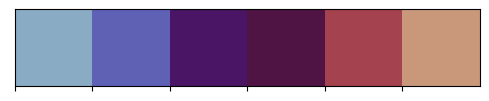

In [22]:
#Selecting the colour palatte to use them in the graphs and charts for better visualization

colors = sb.color_palette('twilight')[0:6]
sb.palplot(colors)

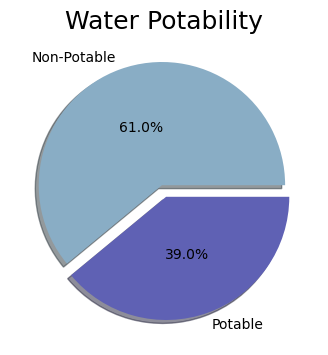

In [23]:
#Visualising data as Potable and Non-Potable 

labels = ['Non-Potable', 'Potable']
data = [df['Potability'].value_counts()[0],
         df['Potability'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots(figsize=[10,4])
ax1.pie(data, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True, colors = colors)
plt.title("Water Potability", fontsize=18);
plt.show()

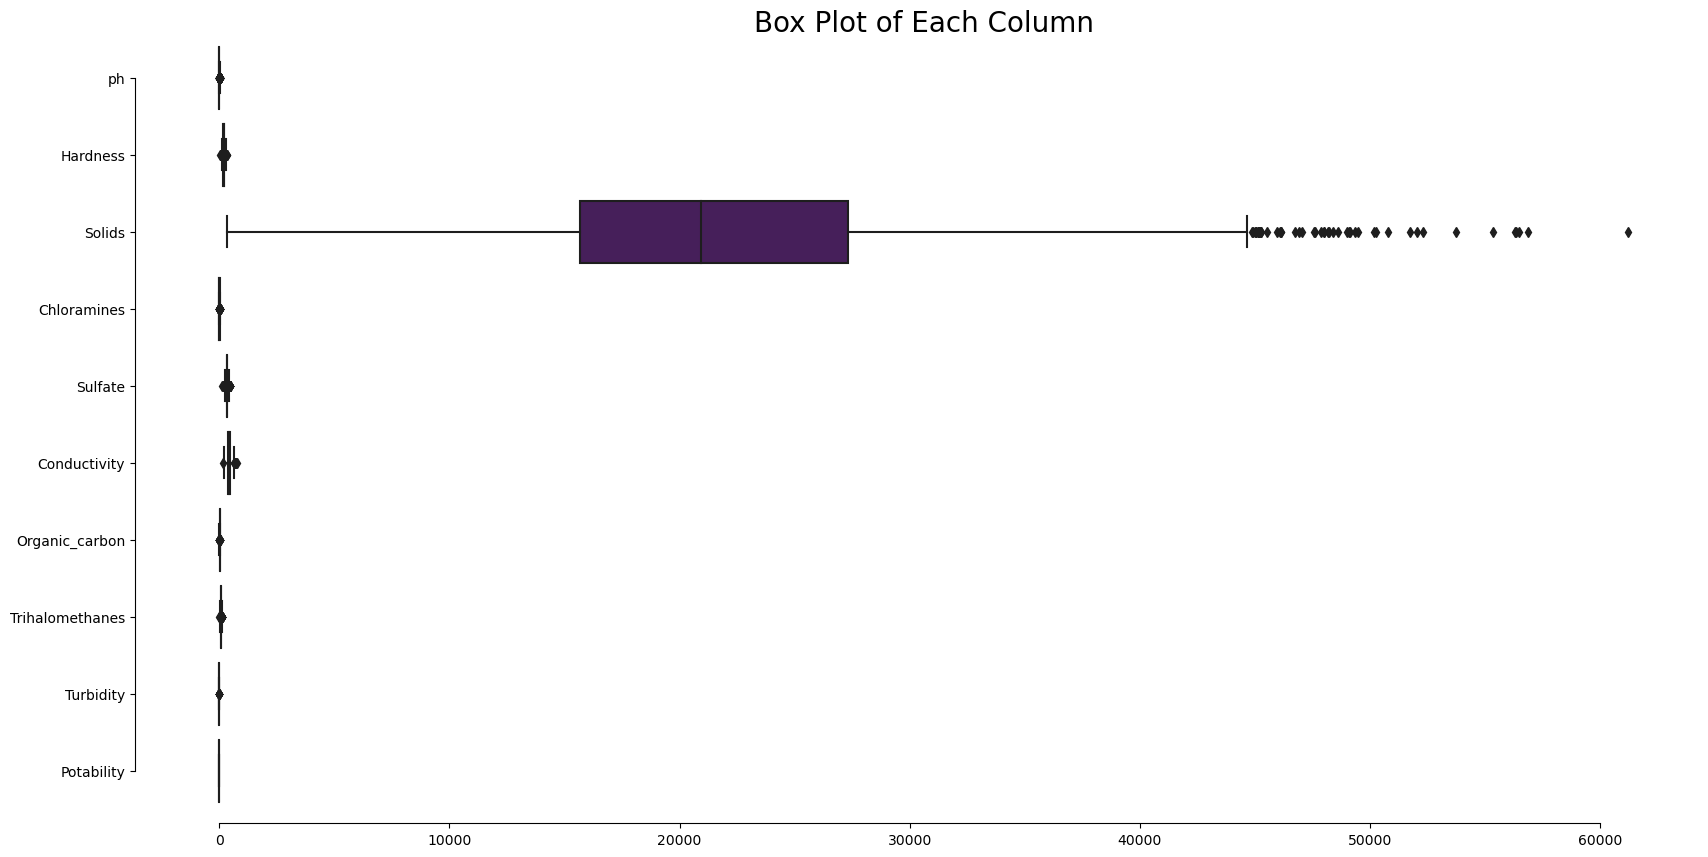

In [24]:
#Box Plot of Each parameters of the data

fig1, ax = plt.subplots(figsize=[20,10])
ax = sb.boxplot(data=df, orient="h",palette = colors)
sb.despine(offset=10, trim=True)
plt.title("Box Plot of Each Column", fontsize=20);
plt.show()

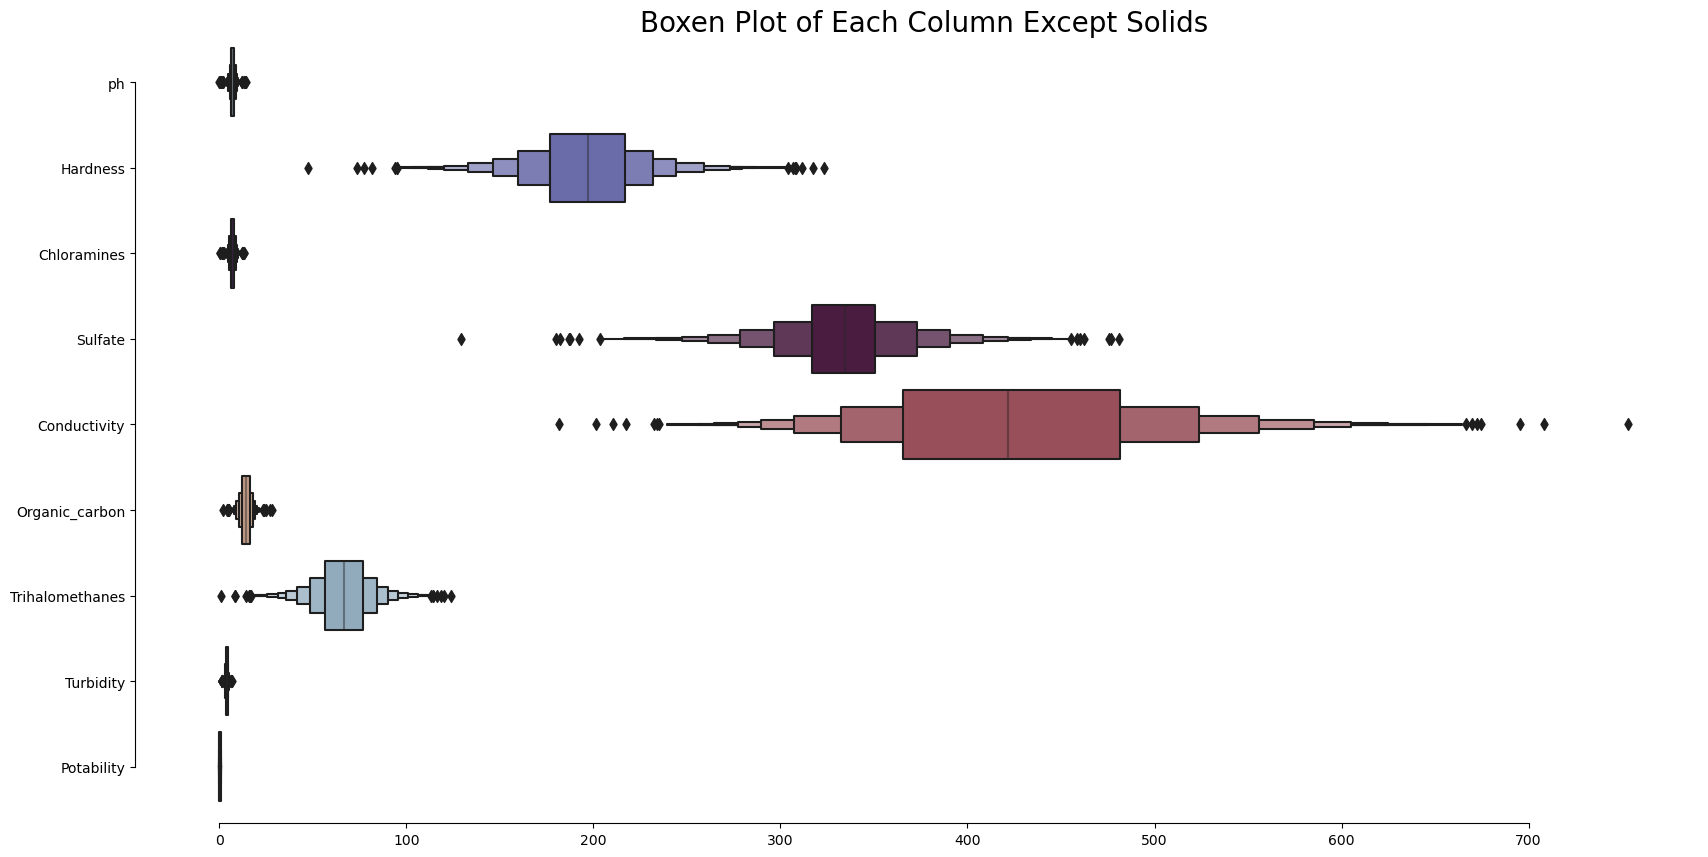

In [25]:
#Boxen Plot of each parameters except Solids

df1 = pd.DataFrame()
df1 = df
df1 = df1.drop("Solids",1)
fig1, ax = plt.subplots(figsize=[20,10])
ax = sb.boxenplot(data=df1, orient="h", palette=colors)
sb.despine(offset=10, trim=True)
plt.title("Boxen Plot of Each Column Except Solids", fontsize=20);
plt.show()

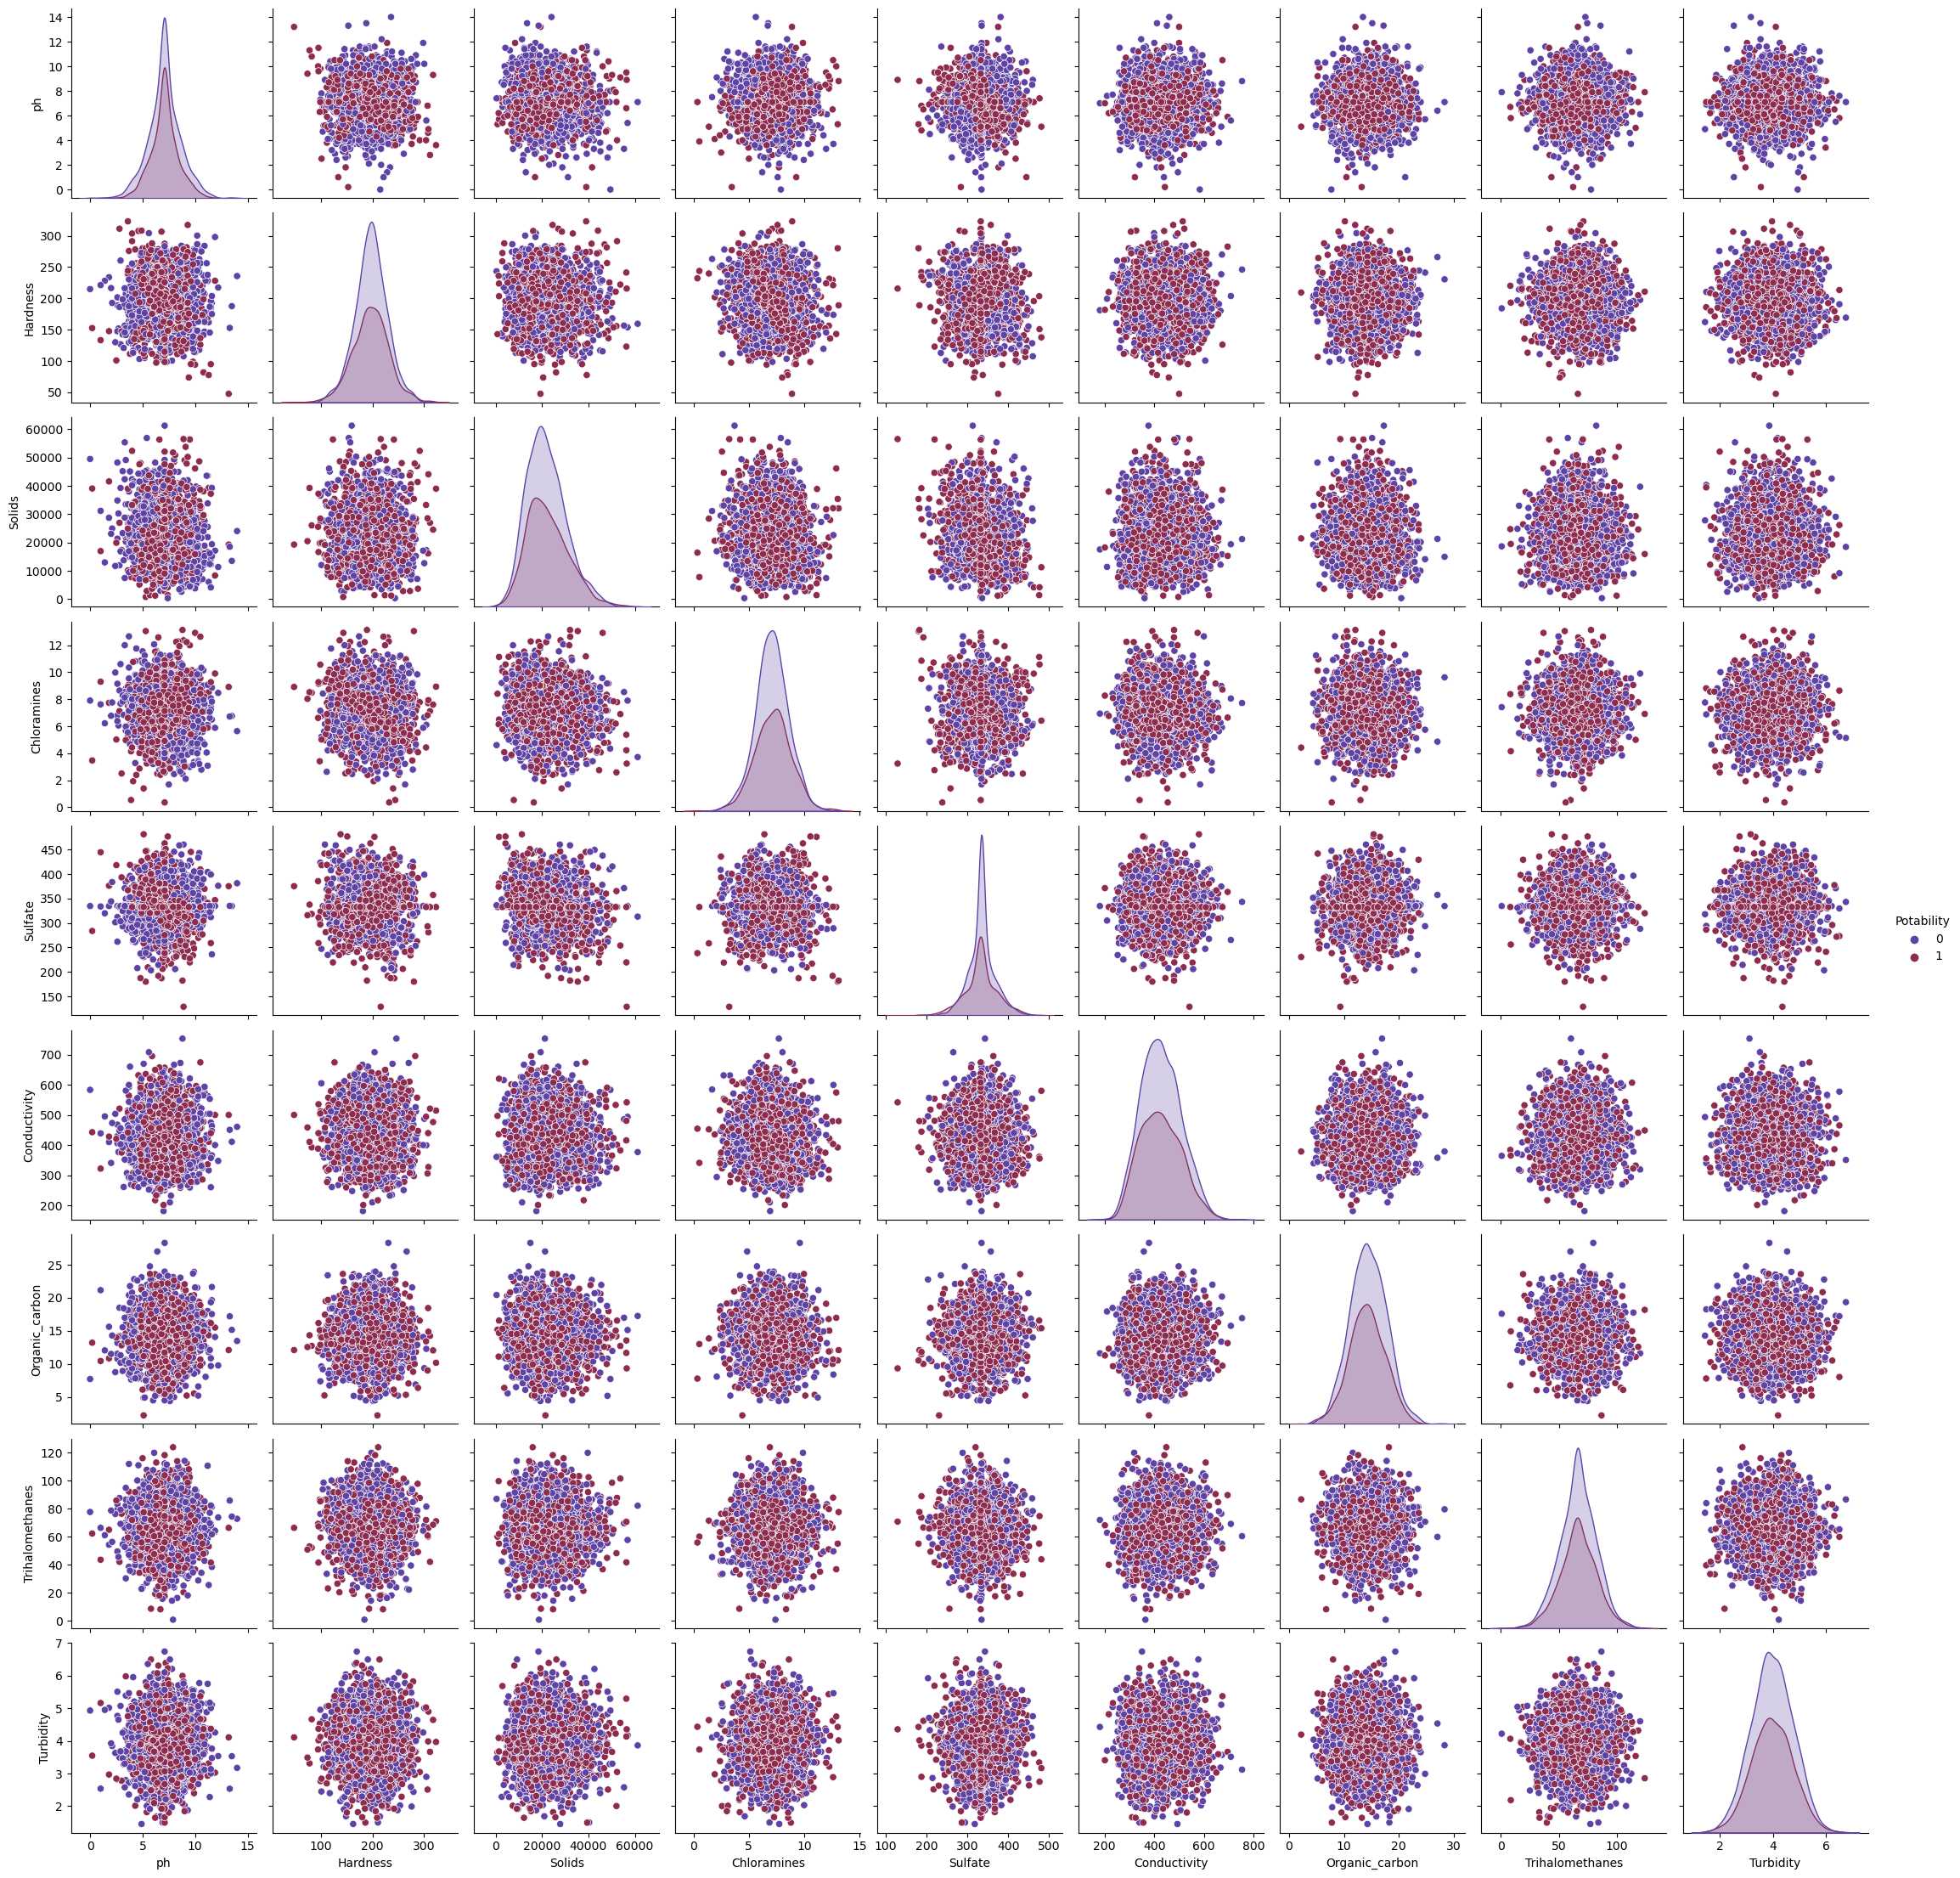

In [26]:
#Pairplot showning relation between all the parameters among each other

ax = sb.pairplot(df, hue="Potability",diag_kind="kde",kind="scatter",palette="twilight")
plt.show()

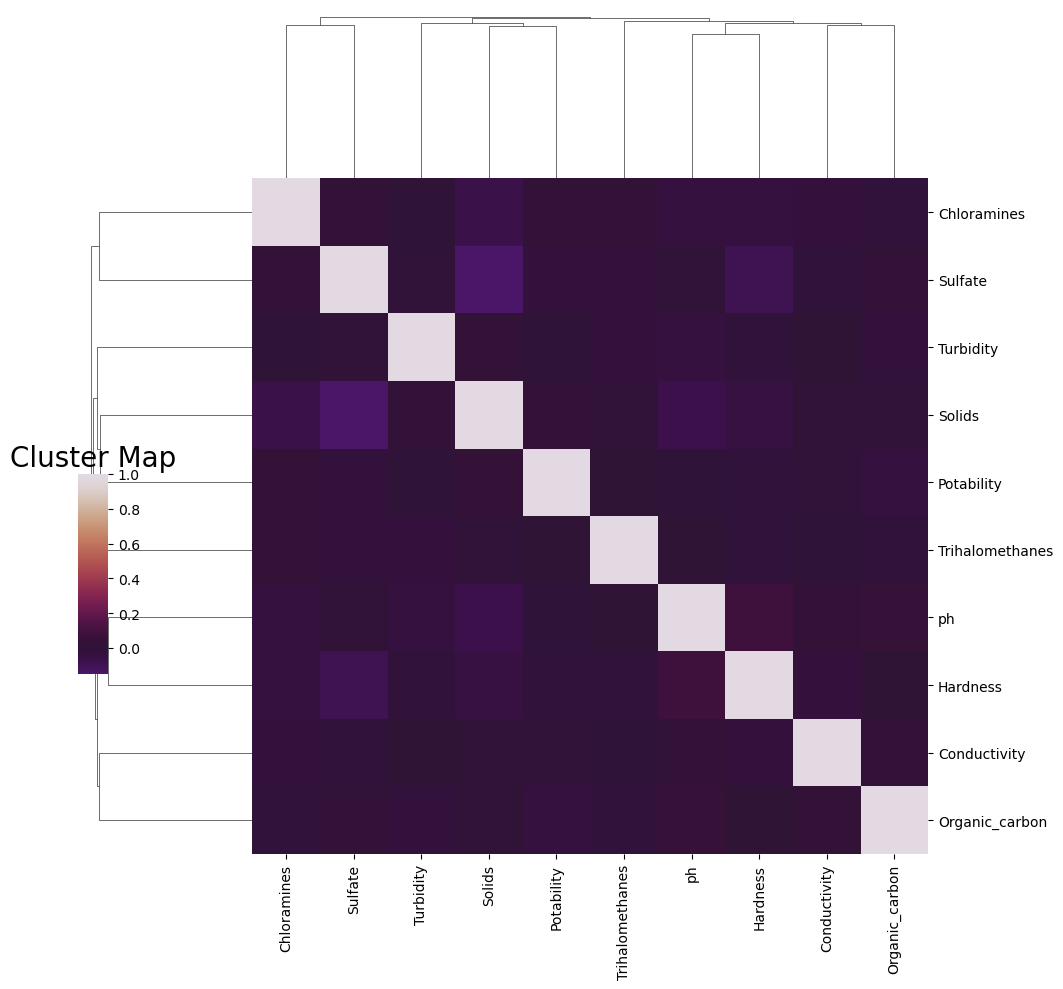

In [27]:
#Visualizing data in a Cluster Map

g = sb.clustermap(df.corr(), center=0, cmap="twilight",
                   dendrogram_ratio=(.2, .2),
                   cbar_pos=(.01, .32, .03, .2), figsize=(10, 10))
plt.title("Cluster Map", fontsize=20);
plt.show()



<AxesSubplot:>

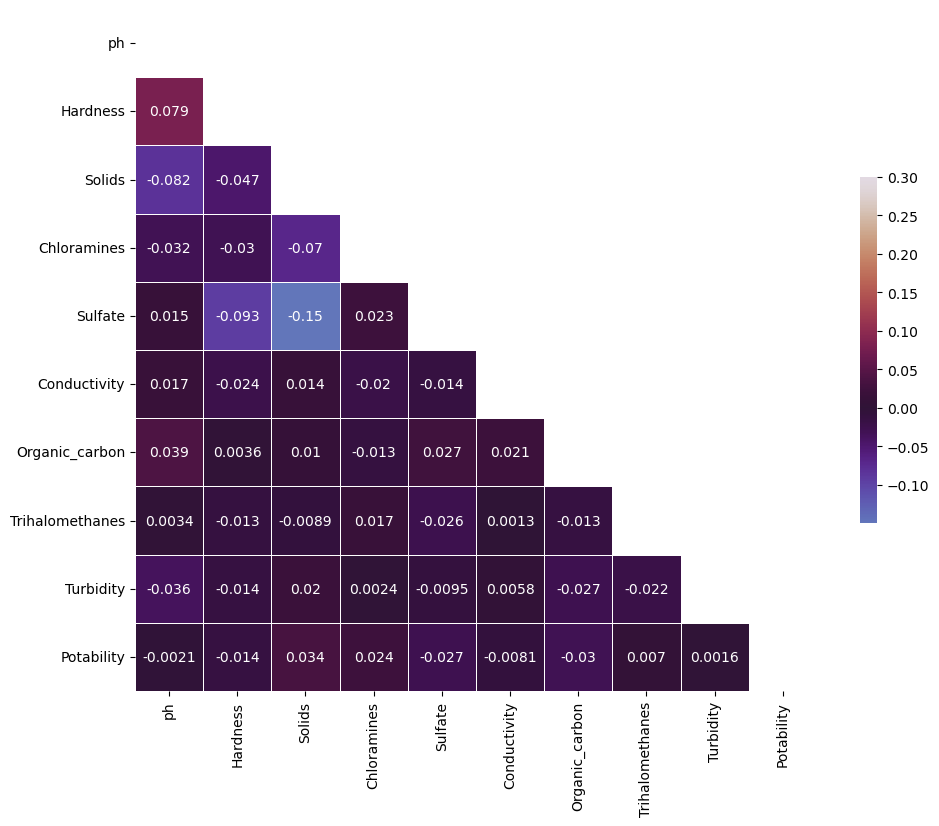

In [28]:
#Annotated Heat Map for Data Visualization

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))

sb.heatmap(corr, mask=mask, cmap="twilight", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot =True)

In [29]:
#One Hot Encoding of Categorical Columns

data = pd.get_dummies(df, columns = ['Type of Water', 'Type of Hardness'])
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.1  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.7  129.422921  18630.057858     6.635246  334.564290    592.885359   
2  8.1  224.236259  19909.541732     9.275884  334.564290    418.606213   
3  8.3  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.1  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  ...  \
0       10.379783        86.990970   2.963135           0  ...   
1       15.180013        56.329076   4.500656           0  ...   
2       16.868637        66.420093   3.055934           0  ...   
3       18.436524       100.341674   4.628771           0  ...   
4       11.558279        31.997993   4.075075           0  ...   

   Type of Water_Alkaline water  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             1   

   Type of Water_Bottled waters labeled as alkaline  \
0                                                 0   
1                                                 0   
2                                                 1   
3                                                 1   
4                                                 0   

   Type of Water_Common bottled waters  \
0                                    1   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   Type of Water_Distilled reverse osmosis water  Type of Water_Ocean water  \
0                                              0                          0   
1                                              0                          0   
2                                              0                          0   
3                                              0                          0   
4                                              0                          0   

   Type of Water_Tap water  Type of Hardness_Hard  \
0                        0                      0   
1                        0                      1   
2                        0                      0   
3                        0                      0   
4                        0                      0   

   Type of Hardness_Moderately hard  Type of Hardness_Slightly hard  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   Type of Hardness_Very Hard  
0                           1  
1                           0  
2                           1  
3                           1  
4                           1  

[5 rows x 21 columns]

In [30]:
#Separation of Target Columns

X = data.drop(['Potability'], axis = 1)
Y = data['Potability']

In [31]:
#Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.75, random_state=83)

In [32]:
#Standardizing The Data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Algorithms to find their Performance Accuracy 

In [33]:
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

62.64

In [34]:
#Support Vector Classifier

svc = SVC()
svc.fit(X_train, y_train)

acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

73.5

In [35]:
#KNeighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

78.27

In [36]:
#Displaying the accuracy of all three models

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'k-NN', 'Logistic Regression'],
    'Accuracy Score': [acc_svc, acc_knn, acc_log, 
              ]})
models.sort_values(by='Accuracy Score', ascending=False)

Model  Accuracy Score
1                     k-NN           78.27
0  Support Vector Machines           73.50
2      Logistic Regression           62.64

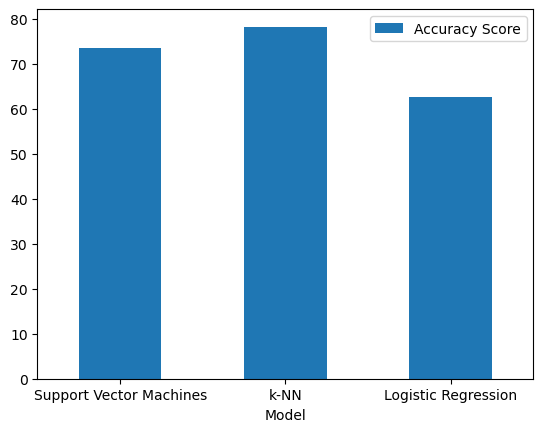

In [37]:
#A bar plot of the 'Model' and 'Accuracy Score' columns

models.plot.bar(x='Model', y='Accuracy Score', rot=0)

# Displaying the bar-diagram

plt.show()